File: 0
File: 1
File: 2
File: 3
File: 4


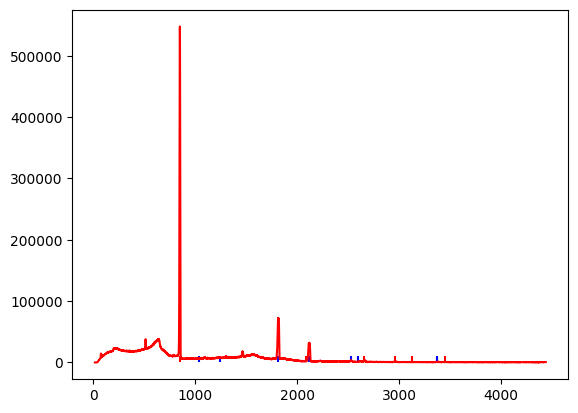

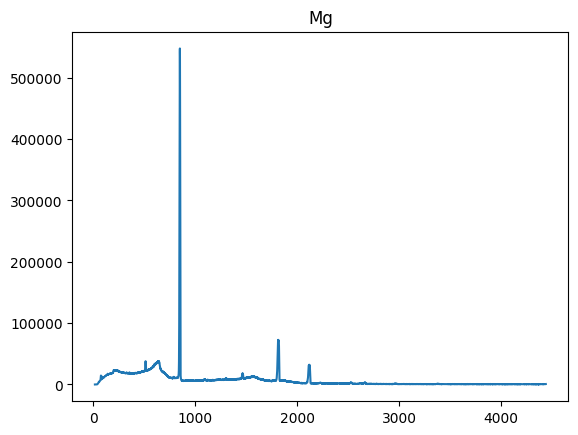

In [159]:
import numpy as np
import pandas as pd
import glob
import os
import scipy.stats as ss
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from zipfile import ZipFile


  
# #specifying the zip file name
# for i in range(5):
#     file_name = f'Dag 2/Mg_data/Mg_1_maalning_dag2_ch000{i}.zip'
    
#     # opening the zip file in READ mode
#     with ZipFile(file_name, 'r') as ti:
#         # printing all the contents of the zip file
#         ti.printdir()
    
#         # extracting all the files
#         ti.extractall()

# a = 0.73971712
# ae = 9.9e-7
# b = 0.3785
# be = 1.4e-3

# data = []
# 
#     data.append(np.loadtxt(f'Mg_1_maalning_dag2_ch000{i}.txt')[1])

def getCounts(j, lc: int = 20, hc: int = 6000):
    
    counts = []
    for i in range(j):
        print('File:', str(i))
        data = np.loadtxt(f"Mg_1_maalning_dag2_ch000{i}.txt")
        counts.append(data[:, 1])
    
    (x, y) = np.unique(np.concatenate(counts), return_counts=True)
    lI = np.where(x >= lc)[0][0]
    hI = np.where(x >= hc)[0][0]
    x = x[lI:hI]
    y = y[lI:hI]
    
    a = 0.73971712
    ae = 9.9e-7
    b = 0.3785
    be = 1.4e-3
    x  = x * a + b
    
    a = 180.66341379895778
    b = 0.034598909761420625
    usikkerheder: [6.52763544e+00, 5.95806196e-03]    
    eff = a *1 / x + b
    y = y / eff


    return (x, y)

Line = [3445.279,3369.91,3122.908,2959.935,2657.547,2085.064,846.77]
line = [2598.438, 3369.81,2523.06,1037.833,2113.092,1810.726, 1238.27]


plt.vlines(Line, 0, 10000, colors='r', linestyles='dashed')
plt.vlines(line, 0, 10000, colors='b', linestyles='dashed')



Mg1 = getCounts(5)
# Mg2 = getCounts(1)
# Mg3 = getCounts(2)
# Mg4 = getCounts(3)
# Mg5 = getCounts(4)


# ener = np.concatenate([Mg1[0], Mg2[0] , Mg3[0] , Mg4[0] , Mg5[0]])
# Coun = np.concatenate([Mg1[1], Mg2[1] , Mg3[1] , Mg4[1] , Mg5[1]])

plt.plot(Mg1[0], Mg1[1], color="r", label="data")
plt.show()

# plt.vlines(Line, 0, 10000, colors='r', linestyles='dashed')
# plt.vlines(line, 0, 10000, colors='b', linestyles='dashed')

plt.plot(Mg1[0], Mg1[1])
plt.title('Mg')

plt.show()




def gaussFit(x, mu, sig, a, b, c):
    lny = np.log(a) - ((x-mu)**2)/(2*sig**2)
    return np.exp(lny) - (b*x+c)



In [160]:

def getChannel(name: str, data:tuple , lower_limit: int, upper_limit: int, x_1:int, x_2:int, guess: [int, int, int], guess2 = [0,0]):
    x = data[0][lower_limit:upper_limit]
    y = data[1][lower_limit:upper_limit]


    print('x_min',x[0],'x_max',x[-1], 'y_min',y[0],'y_max', y[-1])
    plt.plot(x, y, color="r", label="data")
    yler = np.sqrt(y)
    pinit = guess + guess2
    xhelp = np.linspace(x_1, x_2, 500)
    print('heplmin',xhelp[0],'helpmax',xhelp[-1])
    popt, pcov = curve_fit(gaussFit, x, y, p0=pinit, sigma=yler, absolute_sigma=True)
    print(name)
    print('mu :', popt[0])
    print('sigma :', popt[1])
    print('scaling', popt[2])
    print('background', popt[3], popt[4])
    perr = np.sqrt(np.diag(pcov))
    print('usikkerheder:', perr)
    chmin = np.sum(((y - gaussFit(x, *popt)) / yler) ** 2)
    print('chi2:', chmin, ' ---> p:', ss.chi2.cdf(chmin, 4))

    
    plt.plot(xhelp, gaussFit(xhelp, *popt), 'k-.', label="gaussfit")
    plt.legend()

    plt.title(name)
    plt.grid()
    plt.show()


    return [popt, perr, name]


In [161]:
def t(x):
    return int(x/ a - b)

def effect(x):
    a = 180.66341379895778
    b = 0.034598909761420625
    usikkerheder: [6.52763544e+00, 5.95806196e-03]    
    return a *1 / x +b


x_min 754.8899624000001 x_max 1124.00880528 y_min 11043.246159032731 y_max 7254.381644192252
heplmin 750.0 helpmax 1000.0
Mg E=846.77
mu : 848.263744517797
sigma : 3.063379405729002
scaling 564883.8243651039
background 10.059869510539746 -16763.602871431784
usikkerheder: [1.34922407e-03 1.00656367e-03 2.92743088e+02 3.92488732e-02
 3.78159630e+01]
chi2: 254024.74262352497  ---> p: 1.0


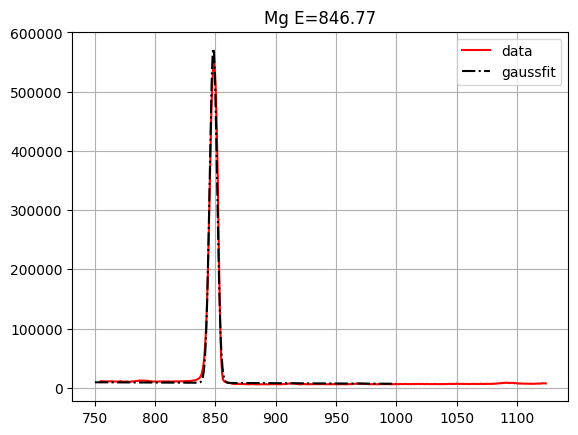

x_min 2071.5864359999996 x_max 2087.1204955199996 y_min 2503.9183472055197 y_max 2220.204791201161
heplmin 2075.0 helpmax 2088.0
Mg E=2085.0
mu : 2087.1451440603564
sigma : 27.132974004491285
scaling 0.00045903515876161627
background -1.4991822569988031 864.6349723854423
usikkerheder: [8.59322340e+07 2.42303400e+07 5.26426270e+02 5.41628742e+01
 1.12681989e+05]
chi2: 179.9065484263415  ---> p: 1.0


C:\Users\David\AppData\Local\Temp\ipykernel_19988\2568006680.py:96: RuntimeWarning: invalid value encountered in log
  lny = np.log(a) - ((x-mu)**2)/(2*sig**2)


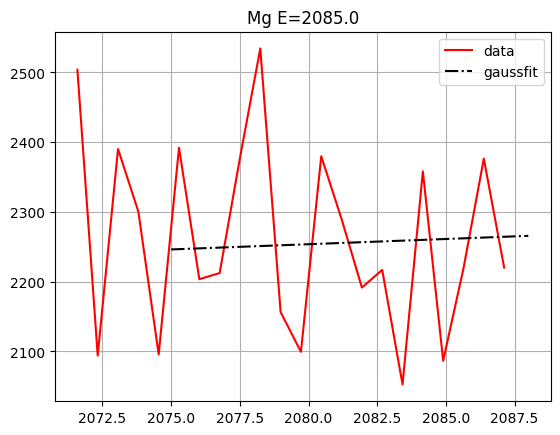

x_min 1124.7485224 x_max 1345.92394128 y_min 7473.446606102214 y_max 8245.031834691734
heplmin 1100.0 helpmax 1300.0
Mg E=1238.27
mu : 1240.485707780175
sigma : 3.6359944206186734
scaling 634.8078180468925
background -6.176314181631412 100.77700896983815
usikkerheder: [2.44436382e-01 2.46252585e-01 3.74640202e+01 7.81547556e-02
 9.63623885e+01]
chi2: 9530.113747398496  ---> p: 1.0


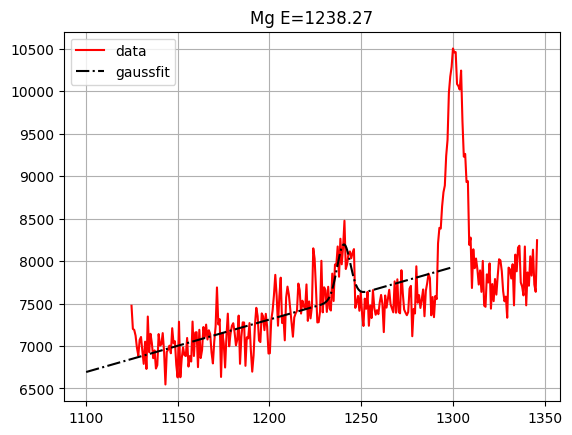

x_min 2234.3242023999996 x_max 2973.30160528 y_min 2355.8533644405566 y_max 1352.7571649337972
heplmin 2500.0 helpmax 2800.0
Mg E=2657.54
mu : 2662.005364173735
sigma : 6.889765006877184
scaling 1955.8433258835903
background 1.6937450609402027 -5630.47707411241
usikkerheder: [5.69695028e-02 5.24083869e-02 1.55368355e+01 5.17975110e-03
 1.38578247e+01]
chi2: 66532.8009062594  ---> p: 1.0


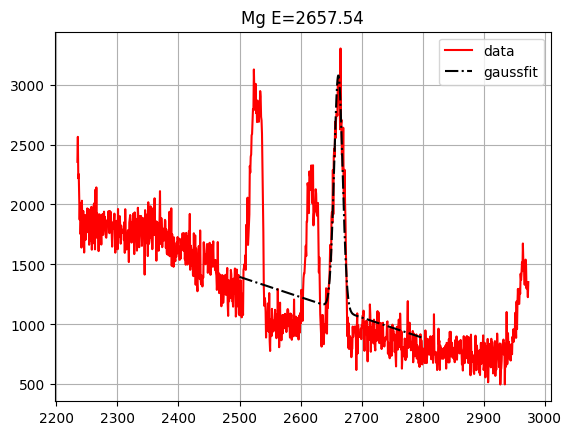

x_min 1716.5222184000002 x_max 1937.69763728 y_min 6042.248998373534 y_max 4497.984558213594
heplmin 1750.0 helpmax 1900.0
Mg E=1810.72
mu : 1813.7841264036113
sigma : 5.983873596386427
scaling 74531.84875922583
background 6.372073310404368 -17372.670795569487
usikkerheder: [5.85670452e-03 4.69729613e-03 7.99477996e+01 6.65496283e-02
 1.22223822e+02]
chi2: 72053.85589100617  ---> p: 1.0


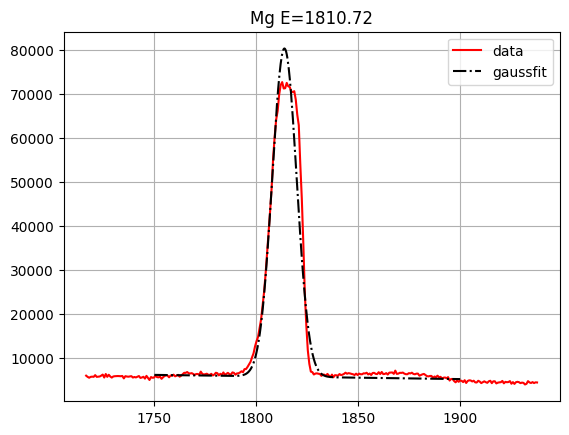

x_min 2826.0978984 x_max 3047.27331728 y_min 964.2152678829688 y_max 820.1451675071531
heplmin 2900.0 helpmax 3000.0
Mg E=2959.03
mu : 2965.7277222250823
sigma : 8.720659880041213
scaling 798.2202075920436
background 0.41946934388622165 -1953.0961776187298
usikkerheder: [1.13412864e-01 1.11747336e-01 9.95455911e+00 2.51550326e-02
 7.37614698e+01]
chi2: 3568.713074475173  ---> p: 1.0


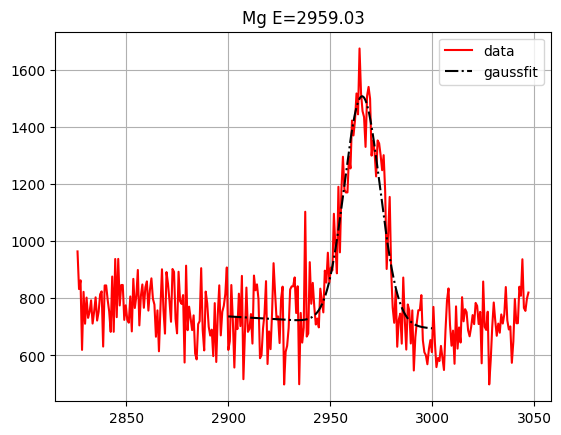

x_min 3048.0130344 x_max 3173.0252276799997 y_min 905.4938242617285 y_max 775.6495341066211
heplmin 3000.0 helpmax 3200.0
Mg E=3122.908
mu : 3122.0
sigma : 0.0
scaling 200.0
background 0.17277534914832887 -1201.5827291904066
usikkerheder: [inf inf inf inf inf]
chi2: 2028.6696291179123  ---> p: 1.0


C:\Users\David\AppData\Local\Temp\ipykernel_19988\2568006680.py:96: RuntimeWarning: divide by zero encountered in divide
  lny = np.log(a) - ((x-mu)**2)/(2*sig**2)
c:\Users\David\AppData\Local\Programs\Python\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


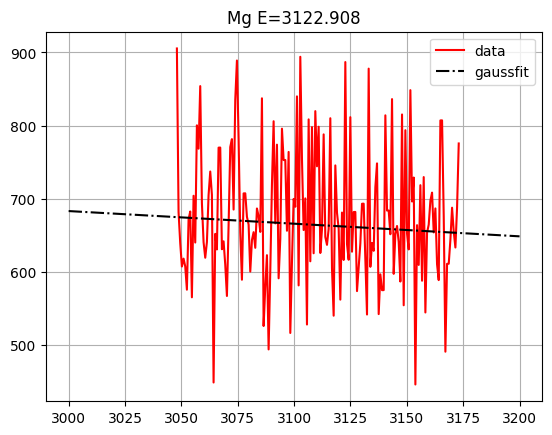

x_min 2027.2034088 x_max 2248.3788276799996 y_min 2529.9381572446982 y_max 1870.351477657484
heplmin 2000.0 helpmax 2200.0
Mg E=2113.09
mu : 2116.1799538891864
sigma : 6.669406015219969
scaling 33685.433481244196
background 1.6474293782161007 -5587.363495907337
usikkerheder: [9.06717971e-03 7.08502546e-03 4.99741956e+01 4.27857858e-02
 9.18648258e+01]
chi2: 49073.273263766416  ---> p: 1.0


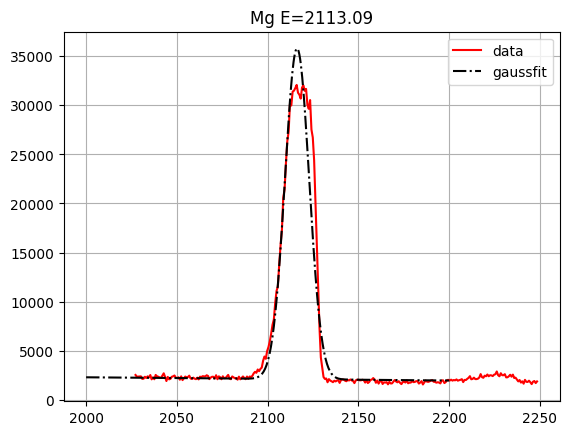

x_min 1006.3937832 x_max 1079.6257780800001 y_min 6197.617419326694 y_max 6749.602036124133
heplmin 1020.0 helpmax 1050.0
Mg E=1037.833
mu : 1037.0076285127088
sigma : 0.5445840278121412
scaling 0.4459008592277306
background -3.048989207042699 -3175.206659401863
usikkerheder: [1.16817052e+02 1.42597003e+02 9.37123927e+01 3.74231469e-01
 3.90399355e+02]
chi2: 442.6648167823393  ---> p: 1.0


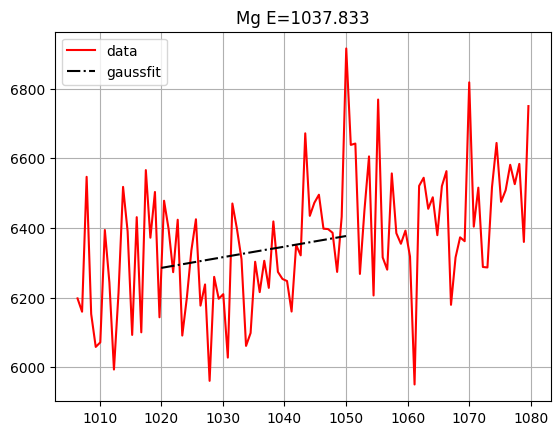

x_min 3048.0130344 x_max 4008.9055732799998 y_min 905.4938242617285 y_max 564.8694179329859
heplmin 3200.0 helpmax 3500.0
Mg E=3369.9
mu : 3377.426184512475
sigma : 10.525449452010147
scaling 262.03543140831795
background 0.1063134753917372 -984.6691366005606
usikkerheder: [3.16165196e-01 3.05266738e-01 7.02630270e+00 2.50456924e-03
 8.92364978e+00]
chi2: 17103.105041783827  ---> p: 1.0


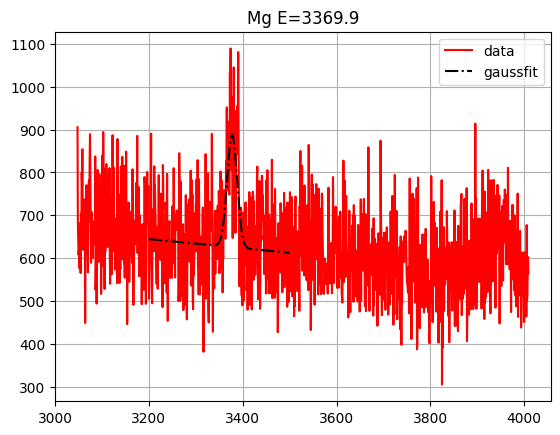

x_min 2382.2676263999997 x_max 2677.41475728 y_min 1765.7341451383184 y_max 1058.038067363909
heplmin 2400.0 helpmax 2600.0
Mg E=2523.06
mu : 2526.515537737657
sigma : 7.085137697239878
scaling 1757.6172192358724
background 0.4084375874689843 -2389.3548499393905
usikkerheder: [6.71380954e-02 6.26097844e-02 1.54584279e+01 2.31180233e-02
 5.85787860e+01]
chi2: 44922.614770195825  ---> p: 1.0


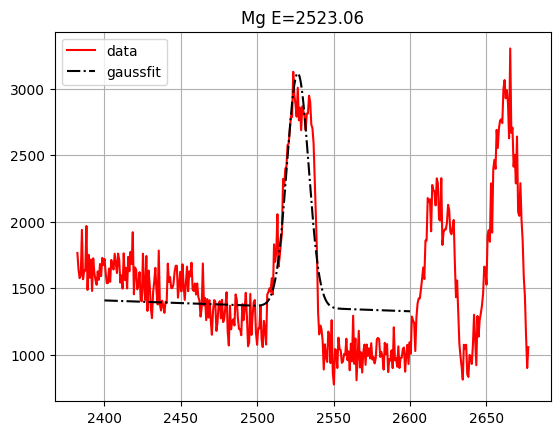

x_min 2567.1969064 x_max 2601.9636110399997 y_min 904.9970790855037 y_max 1259.2230937244165
heplmin 2580.0 helpmax 2600.0
Mg E=2598.43
mu : 2727.4851785145506
sigma : 116.74263861067593
scaling 0.0008584319187323003
background -1.7854839327577519 3609.78672054938
usikkerheder: [3.64676149e+08 1.41708261e+08 1.83980309e+03 1.68565664e+01
 4.17993794e+04]
chi2: 376.6680196904024  ---> p: 1.0


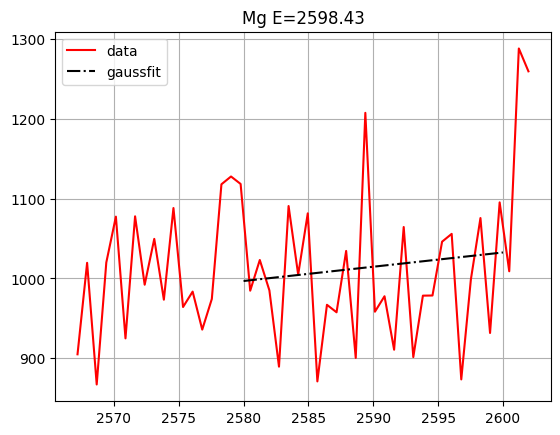

In [166]:
chs = []

chs += [getChannel("Mg E=846.77", Mg1,  1000, 1500, 750, 1000, [850, 10, 200])]
chs += [getChannel("Mg E=2085.0", Mg1, 2780, 2802, 2075,2088, [2085, 10, 100])]    
chs += [ getChannel("Mg E=1238.27", Mg1, 1500, 1800,1100,1300, [1230, 10, 200])]
chs += [ getChannel("Mg E=2657.54", Mg1, 3000, 4000, 2500,2800, [2650, 5, 200])]
chs += [ getChannel("Mg E=1810.72", Mg1, 2300, 2600, 1750,1900,[1810, 25, 200])]
chs += [ getChannel("Mg E=2959.03", Mg1, 3800, 4100, 2900,3000, [2950, 10, 200])] 
chs += [getChannel("Mg E=3122.908", Mg1, 4100, 4270, 3000, 3200, [3122, 0, 200])]
chs += [ getChannel("Mg E=2113.09", Mg1, 2720, 3020, 2000,2200, [2120, 10, 200])]
chs += [ getChannel("Mg E=1037.833", Mg1, 1340, 1440,1020,1050, [1037, 0.5, 5000])]
chs += [ getChannel("Mg E=3369.9", Mg1, 4100, 5400,3200, 3500, [3360, 10, 200])]
chs += [ getChannel("Mg E=2523.06", Mg1, 3200, 3600,2400,2600, [2520, 20, 500])]
chs += [ getChannel("Mg E=2598.43", Mg1, 3450, 3498,2580,2600, [2598, 10, 20])]

In [167]:
ch= np.array(chs)
ch

C:\Users\David\AppData\Local\Temp\ipykernel_19988\3110951003.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ch= np.array(chs)


array([[array([ 8.48263745e+02,  3.06337941e+00,  5.64883824e+05,  1.00598695e+01,
               -1.67636029e+04])                                                  ,
        array([1.34922407e-03, 1.00656367e-03, 2.92743088e+02, 3.92488732e-02,
               3.78159630e+01])                                               ,
        'Mg E=846.77'],
       [array([ 2.08714514e+03,  2.71329740e+01,  4.59035159e-04, -1.49918226e+00,
                8.64634972e+02])                                                  ,
        array([8.59322340e+07, 2.42303400e+07, 5.26426270e+02, 5.41628742e+01,
               1.12681989e+05])                                               ,
        'Mg E=2085.0'],
       [array([1240.48570778,    3.63599442,  634.80781805,   -6.17631418,
                100.77700897])                                            ,
        array([2.44436382e-01, 2.46252585e-01, 3.74640202e+01, 7.81547556e-02,
               9.63623885e+01])                                       

In [168]:
#A = H * Sigma \sqrt(2pi)

def Areal(t):
    H = t[2]
    Sigma = t[1]
    A = H * Sigma * (2*np.pi)**0.5
    return A

Areals = [Areal(i) for i in ch[:,0]]
Areals

[4337603.60633684,
 0.031220027662381945,
 5785.693314484112,
 33777.57025915535,
 1117929.0433478863,
 17448.656815170456,
 0.0,
 563143.7020388962,
 0.6086857619573081,
 6913.382770932839,
 31214.941682278717,
 0.25120327471831977]

In [169]:

na = {}
for i in range(len(Areals)):
    na.update({chs[i][2][5:]: Areals[i]})

print(na)
E7 = na['2598.43']
E6 = na['3369.9'] + na['2523.06']
E5 = na['1037.833']
E4 = na['2959.03'] + na['2113.09']
E3 = na['2657.54'] + na['1810.72']
E2 = na['1238.27'] - na['1037.833']
E1 = na['846.77'] - na['1238.27'] - na['1810.72'] - na['2113.09'] - na['2523.06'] - na['2598.43']

E = E7, E6, E5, E4, E3, E2, E1

print(E)

{'846.77': 4337603.60633684, '2085.0': 0.031220027662381945, '1238.27': 5785.693314484112, '2657.54': 33777.57025915535, '1810.72': 1117929.0433478863, '2959.03': 17448.656815170456, '3122.908': 0.0, '2113.09': 563143.7020388962, '1037.833': 0.6086857619573081, '3369.9': 6913.382770932839, '2523.06': 31214.941682278717, '2598.43': 0.25120327471831977}
(0.25120327471831977, 38128.32445321156, 0.6086857619573081, 580592.3588540666, 1151706.6136070415, 5785.084628722155, 2619529.97475002)


In [182]:
print(E7/sum(E), E6/sum(E), E5/sum(E), E4/sum(E), E3/sum(E), E2/sum(E), E1/sum(E))

5.714694020195774e-08 0.008673919876131374 1.384716376781397e-07 0.13208059031217415 0.26200498003779 0.0013160651894827383 0.5959242489658438
